In [ ]:
import pandas as pd
import numpy as np

# data exploration and preparation
from sklearn.metrics import mutual_info_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler

# model training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, auc, recall_score, precision_score, confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import seaborn as sns
from matplotlib import pyplot as plt
import graphviz
from sklearn import tree
import emoji

plt.rcParams['figure.figsize'] = (12,5)
plt.style.use('fivethirtyeight')

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=566ff232c7d475a4e7ce912a2361b995b8b45c6643e78eb846ce9817ff136267
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


# **Exploratory Data Analysis**


# **Load the Dataset**

In [ ]:
!wget https://raw.githubusercontent.com/jcdumlao14/ML-zoomcamp-course-homework/main/Capstone%20Project-2/heart_statlog_cleveland_hungary_final.csv
     

--2023-01-20 06:45:18--  https://raw.githubusercontent.com/jcdumlao14/ML-zoomcamp-course-homework/main/Capstone%20Project-2/heart_statlog_cleveland_hungary_final.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39689 (39K) [text/plain]
Saving to: ‘heart_statlog_cleveland_hungary_final.csv’

heart_statlog_cleve 100%[===================>]  38.76K  --.-KB/s    in 0s      

2023-01-20 06:45:19 (114 MB/s) - ‘heart_statlog_cleveland_hungary_final.csv’ saved [39689/39689]



In [ ]:
!head heart_statlog_cleveland_hungary_final.csv

age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
40,1,2,140,289,0,0,172,0,0.0,1,0
49,0,3,160,180,0,0,156,0,1.0,2,1
37,1,2,130,283,0,1,98,0,0.0,1,0
48,0,4,138,214,0,0,108,1,1.5,2,1
54,1,3,150,195,0,0,122,0,0.0,1,0
39,1,3,120,339,0,0,170,0,0.0,1,0
45,0,2,130,237,0,0,170,0,0.0,1,0
54,1,2,110,208,0,0,142,0,0.0,1,0
37,1,4,140,207,0,0,130,1,1.5,2,1


In [ ]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')


In [ ]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


# **Data Cleaning and Preprocessing**

## **Missing values and data types**

## **Functions and methods:**

* `df.isnull().sum()` - retunrs the number of null values in the dataframe.
* `df.x.value_counts()` returns the number of values for each category in x series. The `normalize=True` argument retrieves the percentage of each category. In this project, the mean of heart disease is equal to the target rate obtained with the value_counts method.
* `round(x, y)` - round an x number with y decimal places
* `df[x].nunique()` - returns the number of unique values in x series

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


The dataset consists of 1190 records of the patient. It has 11 features and 1 target variable.

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
# checking missing values in the dataset columnwise

df.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
st_slope               0
target                 0
dtype: int64

In [ ]:
# checking the shape of the dataset
df.shape

(1190, 12)

There is a total of 1190 records and 11 features with 1 target variable.

Text(0.5, 1.0, 'No. of Heart Disease Patients in Dataset')

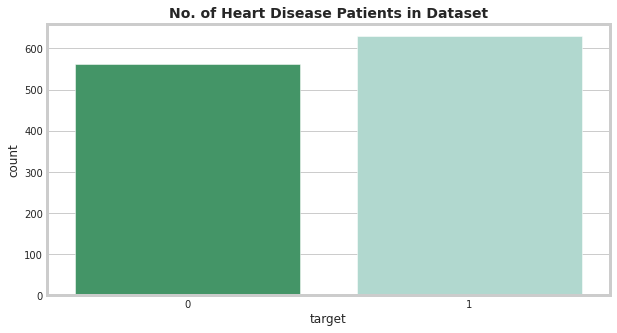

In [ ]:
# Creating distribution of heart disease(target variable)

fig = plt.figure(figsize=(9,5))
sns.set_style('whitegrid')
ax = sns.countplot(x=df['target'], data = df,palette='BuGn_r')
ax.set_title('No. of Heart Disease Patients in Dataset', weight='bold', fontsize=14)


We can see the above plot which gives 629 heart disease patients and 561 normal patients.

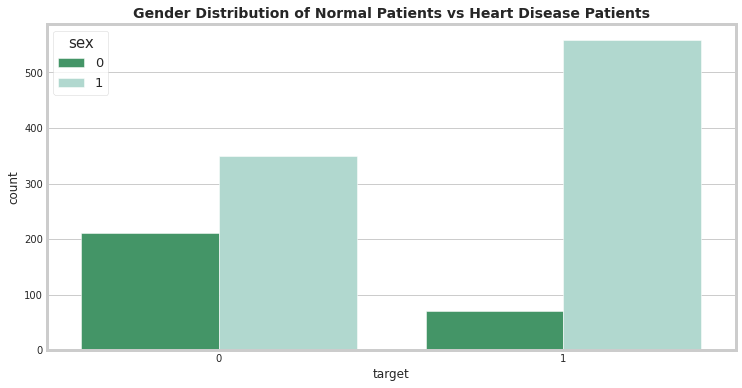

In [ ]:
# Creating gender-wise distribution of normal vs heart disease patients

fig = plt.figure(figsize=(11,6))
sns.set_style('whitegrid')
ax = sns.countplot(x=df['target'], data = df, hue = 'sex', palette='BuGn_r')


plt.title('Gender Distribution of Normal Patients vs Heart Disease Patients', weight='bold', fontsize=14)
plt.legend(title = 'sex', title_fontsize=15,fontsize=13)


In [ ]:
# converting features to categorical features

df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

df['resting_ecg'][df['resting_ecg'] == 0] = 'normal'
df['resting_ecg'][df['resting_ecg'] == 1] = 'ST-T wave abnormality'
df['resting_ecg'][df['resting_ecg'] == 2] = 'left ventricular hypertrophy'

df['st_slope'][df['st_slope'] == 0] = 'normal'
df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df["sex"] = df.sex.apply(lambda x:'male' if x==1 else 'female')


In [ ]:
# checking the top 5 entries of the dataset after feature encoding
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


In [ ]:
# Summary statistics of numerical columns
df.describe(include =[np.number])

,age,resting_bp_s,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_angina,oldpeak,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,0.213445,139.732773,0.387395,0.922773,0.528571
std,9.358203,18.368823,101.420489,0.409912,25.517636,0.487360,1.086337,0.499393
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,140.500000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,269.750000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [ ]:
# Summary statistics of categorical columns
df.describe(include =[np.object])

,sex,chest_pain_type,resting_ecg,st_slope
count,1190,1190,1190,1190
unique,2,4,3,4
top,male,asymptomatic,normal,flat
freq,909,625,684,582


In [ ]:
# store in the different list the names of the categorical and numerical columns

categorical = df.select_dtypes(include=['object']).columns.tolist() # for strings
numerical = df.select_dtypes(include=['int64','float64'])

In [ ]:
categorical = ['sex',	'chest_pain_type',	'resting_ecg','st_slope']
numerical = ['age',	'resting_bp_s',	'cholesterol','fasting_blood_sugar',	'max_heart_rate',	'exercise_angina','oldpeak']

## **Duplicates**

In [ ]:
df.duplicated().count()

1190

In [ ]:
# numerical features
df.describe(include = np.number).round(2)

,age,resting_bp_s,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_angina,oldpeak,target
count,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00
mean,53.72,132.15,210.36,0.21,139.73,0.39,0.92,0.53
std,9.36,18.37,101.42,0.41,25.52,0.49,1.09,0.50
min,28.00,0.00,0.00,0.00,60.00,0.00,-2.60,0.00
25%,47.00,120.00,188.00,0.00,121.00,0.00,0.00,0.00
50%,54.00,130.00,229.00,0.00,140.50,0.00,0.60,1.00
75%,60.00,140.00,269.75,0.00,160.00,1.00,1.60,1.00
max,77.00,200.00,603.00,1.00,202.00,1.00,6.20,1.00


In [ ]:
df[df == 0].count()

age                      0
sex                      0
chest_pain_type          0
resting_bp_s             1
cholesterol            172
fasting_blood_sugar    936
resting_ecg              0
max_heart_rate           0
exercise_angina        729
oldpeak                455
st_slope                 0
target                 561
dtype: int64

In [ ]:
df.shape

(1190, 12)

In [ ]:
print('percentage fasting_blood_sugar')
print(df.fasting_blood_sugar .value_counts(normalize=True).round(4)*100)


percentage fasting_blood_sugar
0    78.66
1    21.34
Name: fasting_blood_sugar, dtype: float64


In [ ]:
print('percentage fasting_blood_sugar')
print(df.sex.value_counts(normalize=True).round(4)*100)

percentage fasting_blood_sugar
male      76.39
female    23.61
Name: sex, dtype: float64


In [ ]:
i = 2
patient = df.iloc[i].to_dict()
patient

{'age': 37,
 'sex': 'male',
 'chest_pain_type': 'atypical angina',
 'resting_bp_s': 130,
 'cholesterol': 283,
 'fasting_blood_sugar': 0,
 'resting_ecg': 'ST-T wave abnormality',
 'max_heart_rate': 98,
 'exercise_angina': 0,
 'oldpeak': 0.0,
 'st_slope': 'upsloping',
 'target': 0}

## **Unique values**

The method `describe()` already showed the unique values for the categorical variables then now, we check the unique values of numerical variables.

In [ ]:
for column in numerical:
  print(f"{column} has {df[column].nunique()} unique values.")

age has 50 unique values.
resting_bp_s has 67 unique values.
cholesterol has 222 unique values.
fasting_blood_sugar has 2 unique values.
max_heart_rate has 119 unique values.
exercise_angina has 2 unique values.
oldpeak has 53 unique values.


# **Feature Importance Analysis of the Target Variable.**

Now, We will try to identify which features affect the target variable.



## **Numerical Variable**

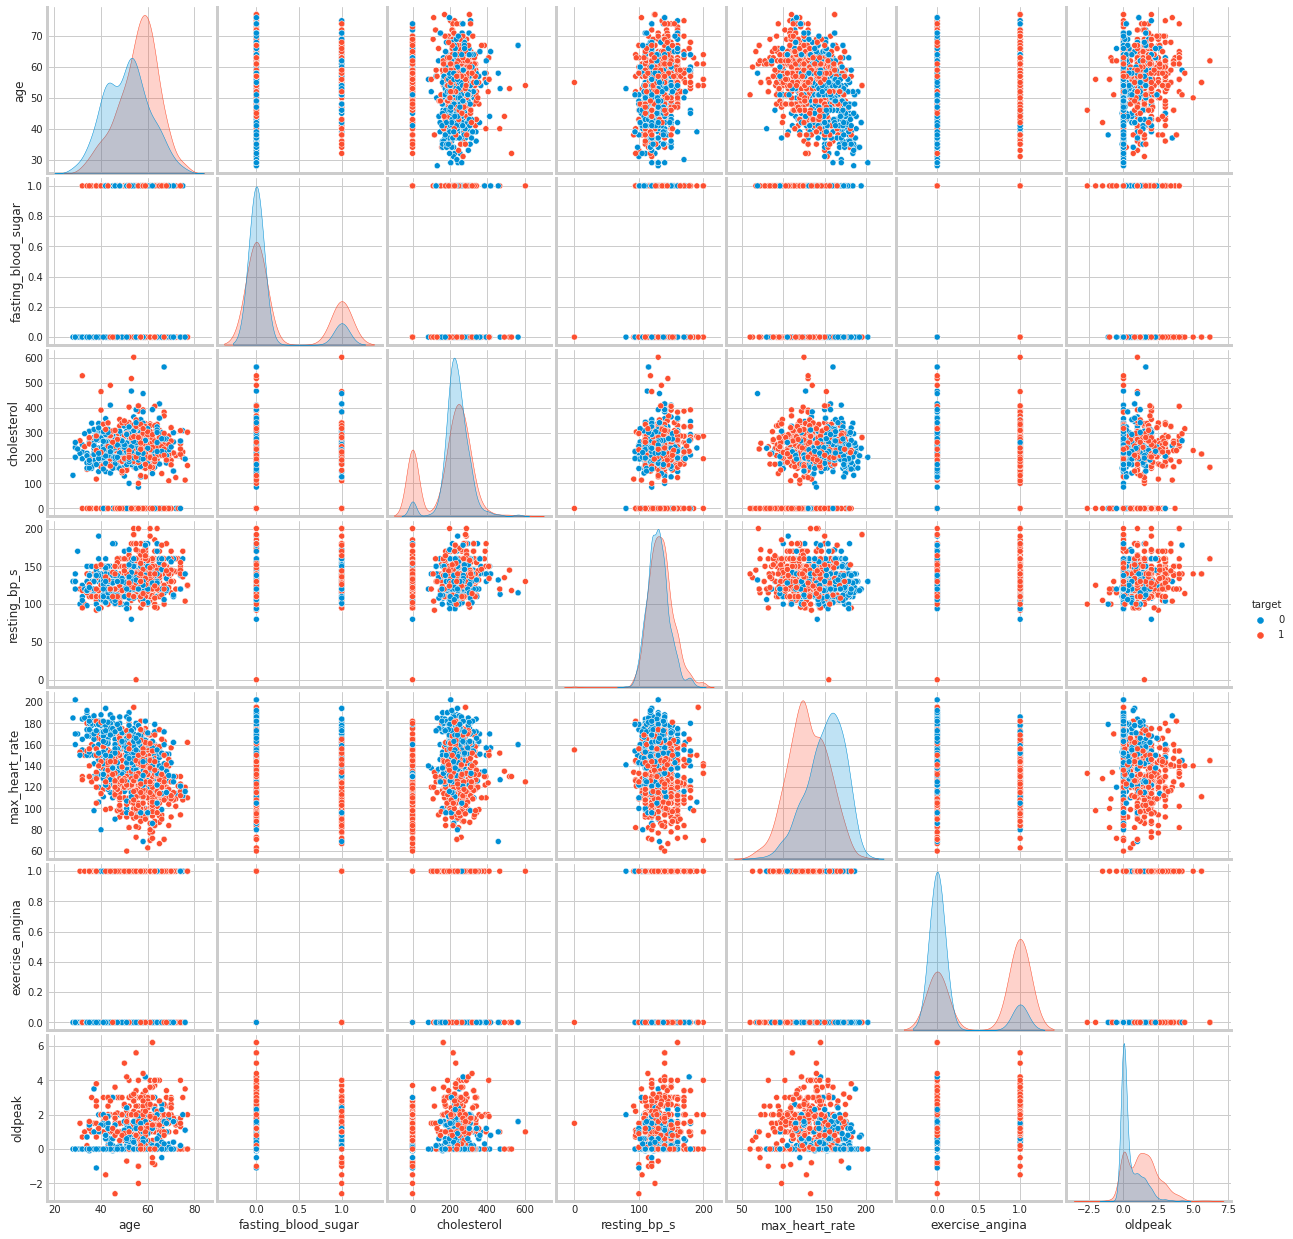

In [ ]:
sns.pairplot(df, hue = 'target', vars = ['age','fasting_blood_sugar','cholesterol','resting_bp_s',
                                         'max_heart_rate','exercise_angina','oldpeak'])

# **Gender Distribution**

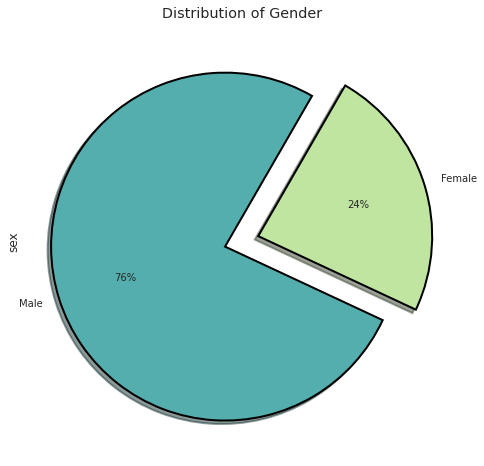

In [ ]:
plt.figure(figsize=(10,8))
df["sex"].value_counts().plot.pie(autopct="%1.0f%%", colors = sns.color_palette("Spectral_r",5),
                                  startangle = 60, labels=["Male","Female"],
                                  wedgeprops={"linewidth":2,"edgecolor": "k"},
                                  explode=[.1,.1],shadow=True)
plt.title("Distribution of Gender")
plt.show()

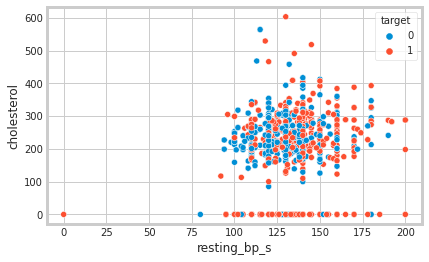

In [ ]:
sns.scatterplot(x= 'resting_bp_s', y = 'cholesterol', hue = 'target', data = df)

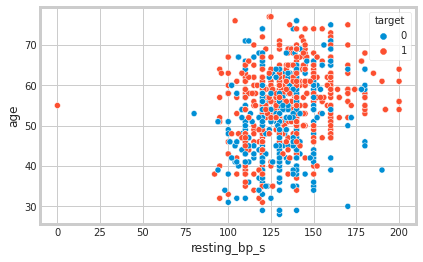

In [ ]:
sns.scatterplot(x = 'resting_bp_s', y = 'age', hue = 'target', data = df)

From the above plot we can see outliers clearly as for some of the patients cholestrol is 0, whereas for one patient both cholestrol and resting bp is 0.

# **Age Distribution**

* Normal Patients 
* Heart Disease Patients

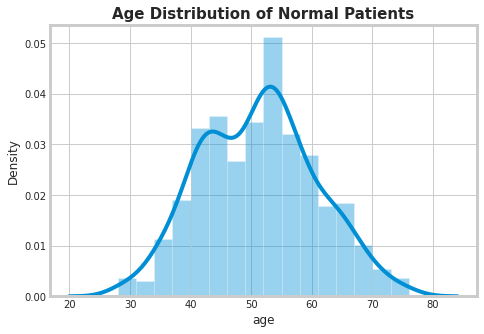

In [ ]:
attr_1 = df[df['target']==1]
attr_0 = df[df['target']==0]
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('Age Distribution of Normal Patients', fontsize=15, weight='bold')
plt.show()

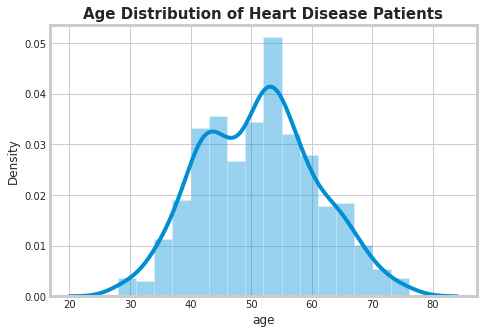

In [ ]:
attr_1 = df[df['target']==1]
attr_0 = df[df['target']==0]
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('Age Distribution of Heart Disease Patients', fontsize=15, weight='bold')
plt.show()

The mean age for heart disease patients is around 58 to 60 years.

In [ ]:
# Exploring the Heart Disease patients based on Chest pain type

plot_criteria=['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]],
                   df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap=cm)
                

target,0,1
chest_pain_type,,
asymptomatic,25.310000,76.790000
atypical angina,32.980000,4.930000
non-anginal pain,34.400000,14.310000
typical angina,7.310000,3.970000


In [ ]:
plot_criteria=['resting_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]],
                   df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap=cm)
                   

target,0,1
resting_ecg,,
ST-T wave abnormality,11.050000,18.920000
left ventricular hypertrophy,26.020000,28.460000
normal,62.920000,52.620000


[From Wikipedia, the free encyclopedia(image Source)](https://en.wikipedia.org/wiki/File:SinusRhythmLabels.svg)

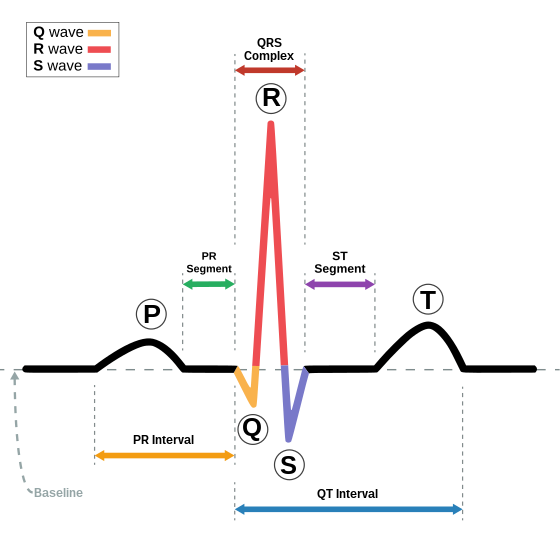

**Electrocardiography** is the process of producing an electrocardiogram (ECG or EKG), a recording of the heart's electrical activity.It is an electrogram of the heart which is a graph of voltage versus time of the electrical activity of the heart using electrodes placed on the skin. These electrodes detect the small electrical changes that are a consequence of cardiac muscle depolarization followed by repolarization during each cardiac cycle (heartbeat). Changes in the normal ECG pattern occur in numerous cardiac abnormalities, including cardiac rhythm disturbances (such as atrial fibrillation and ventricular tachycardia), inadequate coronary artery blood flow (such as myocardial ischemia and myocardial infarction), and electrolyte disturbances (such as hypokalemia and hyperkalemia).

There are three main components to an ECG: 
    
* **P wave**, which represents depolarization of the atria; 
* **QRS complex**, which represents depolarization of the ventricles; 
* **T wave**, which represents repolarization of the ventricles.

In our dataset, around 62% of heart disease patients have normal ECG.

In [ ]:
plot_criteria=['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]],
                   df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap=cm)
                   

target,0,1
st_slope,,
downsloping,3.920000,9.380000
flat,21.930000,72.970000
normal,0.000000,0.160000
upsloping,74.150000,17.490000


[ST segment depression(source)](https://www.google.com/url?sa=i&url=https%3A%2F%2Flitfl.com%2Fst-segment-ecg-library%2F&psig=AOvVaw00LxXMt8CuHadhUIRqv2YJ&ust=1674196334576000&source=images&cd=vfe&ved=0CA8QjRxqFwoTCODh8b-B0_wCFQAAAAAdAAAAABAE)

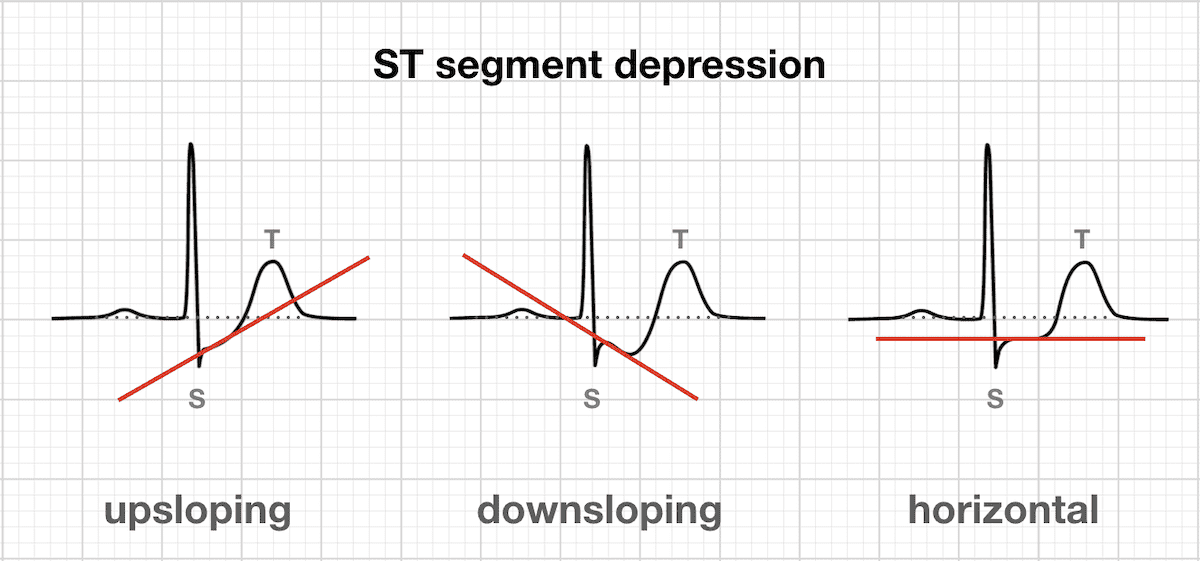

 **[ST/heart rate slope](https://pubmed.ncbi.nlm.nih.gov/3739881/#:~:text=The%20ST%20segment%20shift%20relative,coronary%20artery%20disease%20(CAD).)** (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD).

 * As we can see st slope table, the inference of upsloping is a positive sign as 74% of the normal patients have upslope where as 72% heart patients have flat sloping.

# **Feature importance: Correlation**

**Correlation coefficient** measures the degree of dependency between two variables. This value is negative if one variable grows while the other decreases, and it is positive if both variables increase. Depending on its size, the dependency between both variables could be low, moderate, or strong. It allows measuring the importance of numerical variables.

* Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient




## **Functions and methods:**

`df[x].corrwith(y)` - returns the correlation between x and y series.

[Correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence) is a statistical measure that expresses the strength of the relationship between two variables. The two main types of correlation are positive and negative. A positive correlation occurs when two variables move in the same direction.

In [ ]:
matrix_corr = df.corr().round(3)

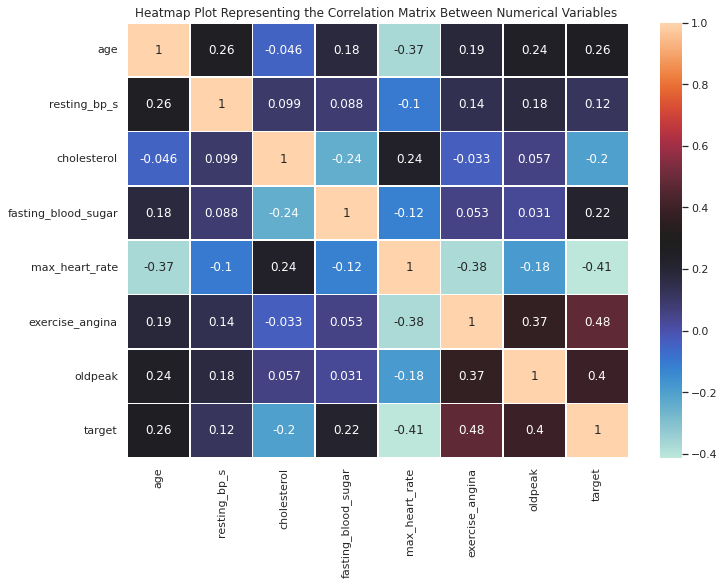

In [ ]:
plt.figure(figsize=(10, 8))
sns.set(font_scale = 1)

sns.heatmap(matrix_corr, annot=True,linewidths=.5, cmap="icefire")
plt.title('Heatmap Plot Representing the Correlation Matrix Between Numerical Variables ')
plt.show()

Heatmap plot representing the correlation matrix between numerical variables to be considered for the data model. The positive values indicate a positive relationship between two variables, while the negative indicates a negative relationship between variables.

# **Feature Importance: ROC AUC**

In [ ]:
feature_scores = []

for col in numerical:
  auc = roc_auc_score(df.target,df[col])
  if auc > 0.4:
    auc = roc_auc_score(df.target, -df[col])
    feature_scores.append((col, auc))

columns = ['feature', 'ROC_AUC']
df_scores = pd.DataFrame(feature_scores, columns=columns)
df_scores.sort_values(by=['ROC_AUC'],ascending=False).reset_index(drop=True)

,feature,ROC_AUC
0,cholesterol,0.550044
1,resting_bp_s,0.429750
2,fasting_blood_sugar,0.411066
3,age,0.342942
4,oldpeak,0.271329
5,exercise_angina,0.265067


## **Categorical Variables**

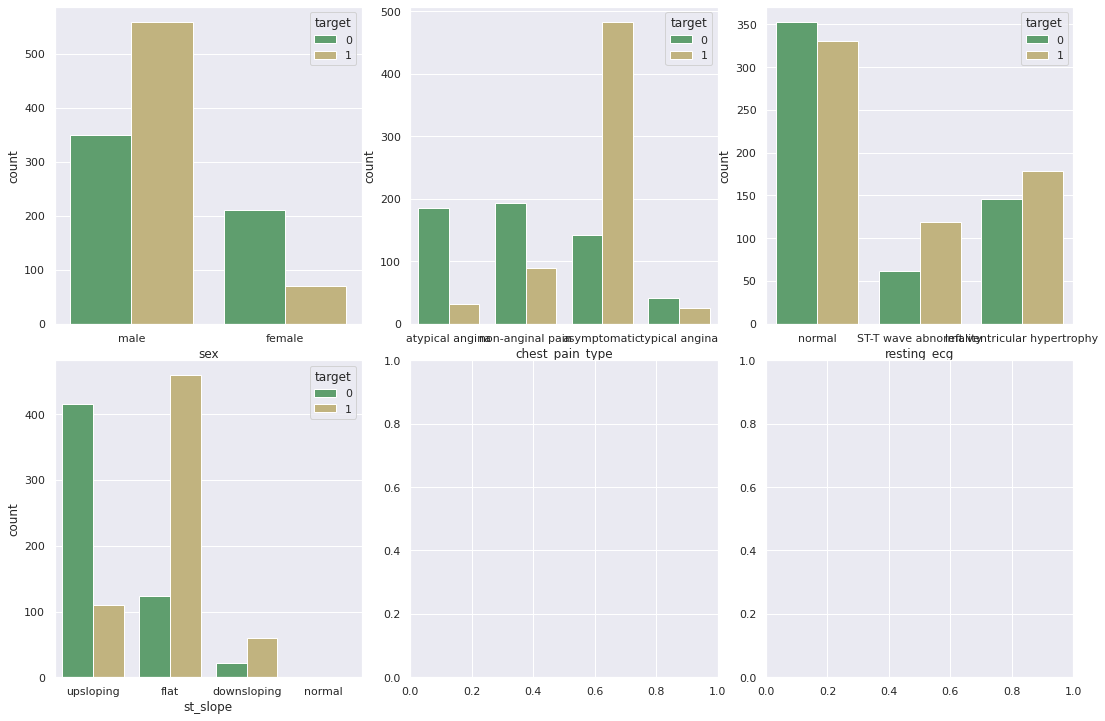

In [ ]:
fig, ax = plt.subplots(2,3, figsize = (15,10))
sns.set_style('whitegrid')
sns.set(font_scale =1)
plt.tight_layout()


colors =["g","y"]
for indx, (column, axes) in list(enumerate(list(zip(categorical, ax.flatten())))):
  sns.countplot(ax= axes, x = df[column], hue = df['target'], palette =colors, alpha=1)

plt.show()

Before moving on to the next steps, we will be loading up the original dataset to predict the Heart Disease of the patient who is suffering from heart risk and if the patient is normal.

In [ ]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
# store in the different list the names of the categorical and numerical columns

categorical = df.select_dtypes(include=['object']).columns.tolist() # for strings
numerical = df.select_dtypes(include=['int64','float64'])


In [ ]:
categorical = ['sex',	'chest_pain_type',	'resting_ecg','st_slope']
numerical = ['age',	'resting_bp_s',	'cholesterol','fasting_blood_sugar',	'max_heart_rate',	'exercise_angina','oldpeak']

# **Feature importance: Mutual information**

**Mutual information** is a concept from information theory, which measures how much we can learn about one variable if we know the value of another. In this project, we can think of this as how much do we learn about Heart Disease if we have the information from a particular feature. So, it is a measure of the importance of a categorical variable.

* https://en.wikipedia.org/wiki/Mutual_information



## **Classes, functions, and methods:**

* `mutual_info_score(x, y)` - Scikit-Learn class for calculating the mutual information between the x target variable and y feature.
* `df[x].apply(y)` - apply a y function to the x series of the df dataframe.
* `df.sort_values(ascending=False).to_frame(name='x')` - sort values in an ascending order and called the column as x.

In [ ]:
def mut_inf_score(series):
  return mutual_info_score(series,df.target)

MutInf = df[categorical].apply(mut_inf_score)
MutInf.sort_values(ascending=False)

st_slope           0.172811
chest_pain_type    0.149893
sex                0.049859
resting_ecg        0.007746
dtype: float64

# **Setting up the Validation framework**

* Perform the train/validation/test split with Scikit-Learn
* Split into three parts train, validation, and test we already implemented this using NumPy and pandas
* 60%, 20%, 20% distribution.

##**Split the Dataset Into the Train, Validation, and Test Dataset**

In [ ]:
df_select = df.copy()
categorical = df_select.select_dtypes(include=['object']).columns.tolist()
numerical = df_select.select_dtypes(include=['int64','float64']).columns.tolist()
numerical.remove('target')

In [ ]:
# seperate train + validation (full) and test by randomly picking 80% and 20% of the original data.
df_full_train, df_test = train_test_split(df_select, test_size=0.20, random_state=1)
# now split the full into train and validation
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train),len(df_val),len(df_test)

(714, 238, 238)

In [ ]:
# reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

# separate the target
y_train = df_train.target.values
y_val = df_val.target.values

# remove the target from the features
del df_train['target']
del df_val['target']

# **Encoding the Categorical Variables**

**One-Hot Encoding** allows encoding categorical variables in numerical ones. This method represents each category of a variable as one column, and a 1 is assigned if the value belongs to the category or 0 otherwise.



## **Classes, functions, and methods:**

* `df[x].to_dict(oriented='records')` - convert x series to dictionaries, oriented by rows.
* `DictVectorizer().fit_transform(x)` - Scikit-Learn class for converting x dictionaries into a sparse matrix, and in this way doing the one-hot encoding. It does not affect the numerical variables.
* `DictVectorizer().get_feature_names()` - returns the names of the columns in the sparse matrix.
* Use Scikit-Learn to encode categorical features

In [ ]:
from sklearn.feature_extraction import DictVectorizer


In [ ]:
categorical = ['sex',	'chest_pain_type',	'resting_ecg','st_slope']
numerical = ['age',	'resting_bp_s',	'cholesterol','fasting_blood_sugar',	'max_heart_rate',	'exercise_angina','oldpeak']

In [ ]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical].to_dict(orient='records')
X_train_cat = dv.fit_transform(train_dict)

val_dict = df_val[categorical].to_dict(orient='records')
X_val_cat = dv.fit_transform(val_dict)

# **Scaling the Numerical and Categorical Variable**

We use the Scikit-Learn function **StandardScaler** to remove the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

How to calculate it:

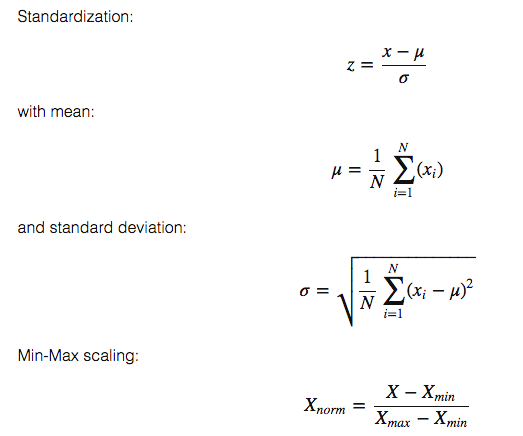

You can read more here:

* http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#standardization-and-min-max-scaling

In [ ]:
scaler = StandardScaler()

X_train_num = df_train[numerical].values
X_train_num = scaler.fit_transform(X_train_num)

X_val_num = df_val[numerical].values
X_val_num = scaler.fit_transform(X_val_num)

In [ ]:
X_train = np.column_stack([X_train_num,X_train_cat])

X_val = np.column_stack([X_val_num, X_val_cat])

# **Model Training**

 Four Supervised Machine Learning Algorithm

* Logistic Regression
* Decision Tree
* Random Forest
* Gradient Boosting 

# **Logistic Regression**

Training a logistic regression model with Scikit-Learn, applying it to the validation dataset, and calculating its accuracy.

### **Classes, functions, and methods:**

* `LogisticRegression( ).fit_transform(x)` - Scikit-Learn class for calculating the logistic regression model.
* `LogisticRegression( ).coef_[0]` - returns the coeffcients or weights of the LR model
* `LogisticRegression( ).intercept_[0]` - returns the bias or intercept of the LR model
* `LogisticRegression( ).predict[x]` - make predictions on the x dataset
* `LogisticRegression( ).predict_proba[x]` - make predictions on the x dataset, and returns two columns with their probabilities for the two categories - soft predictions

In [ ]:
lr = LogisticRegression(random_state= 1)
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_val)[:,1]

t = 0.5

acc = accuracy_score(y_val, y_pred >= t)

print('Treshold','Accuracy')
print('%.2f     %.3f' % (t,acc))


Treshold Accuracy
0.50     0.794


In [ ]:
lr_param_grid = {
    'C':[0.01, 0.1, 1, 10, 100],
    'max_iter': [150, 100, 200],
    'solver': ['lbfgs'],
    'penalty': ['none', '12']
}

lr_grid = GridSearchCV(
    estimator = LogisticRegression(random_state=1),
    param_grid = lr_param_grid,
    refit = True,
    verbose = 1,
    cv = 5)

lr_grid.fit(X_train, y_train)
lr_grid.best_params_

print('Mean Accuracy: %.3f' % lr_grid.best_score_)
print('Best Parameters: %s' % lr_grid.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mean Accuracy: 0.815
Best Parameters: {'C': 0.01, 'max_iter': 150, 'penalty': 'none', 'solver': 'lbfgs'}


In [ ]:
lr = LogisticRegression(random_state =1, max_iter = 150)
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_val)[:, 1]

# **Metric Selection**

In [ ]:
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics

In [ ]:
# define the function that calculates the metrics for several

def tune_threshold(y_val, y_pred, number_of_thres):

  thresholds = np.linspace(0,1, number_of_thres)
  metrics = []

  for t in thresholds:
    acc = accuracy_score(y_val,y_pred >= t)
    pr = precision_score(y_val, y_pred >= t,zero_division=0)
    rec = recall_score(y_val, y_pred >= t)
    f1 = f1_score(y_val, y_pred >= t)
    metrics.append((t, acc, pr, rec, f1))
    
  columns = ['threshold', 'accuracy', 'precision', 'recall', 'F1']
  df_metrics = pd.DataFrame(metrics,columns=columns)
  
  return df_metrics

The ROC AUC is 0.876


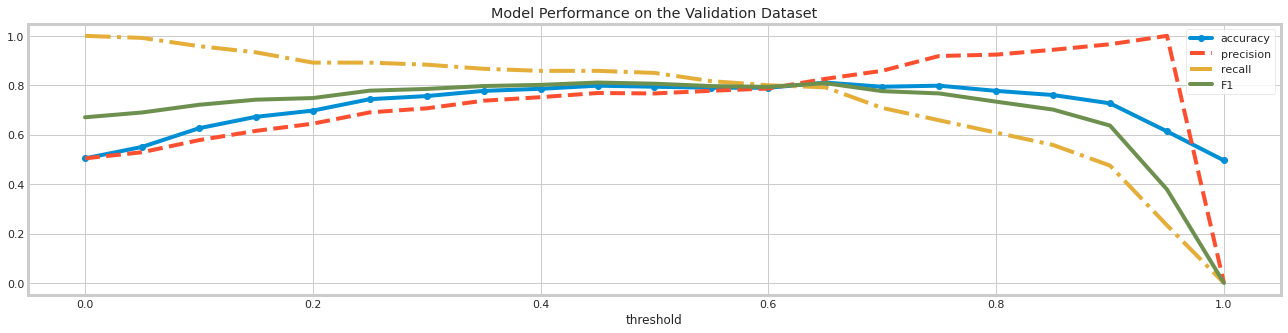

In [ ]:
# apply the thresholds function
sns.set_style('whitegrid')

df_metrics = tune_threshold(y_val,y_pred, 21)
df_metrics.plot(x='threshold', y=['accuracy','precision','recall', 'F1'],
                title = 'Model Performance on the Validation Dataset',
                kind="line", style=['o-','--','-.'],figsize=(20,5));

print('The ROC AUC is', roc_auc_score(y_val, y_pred).round(3))

plt.show()

In [ ]:
df_metrics[df_metrics.F1.round(3) == max(df_metrics.F1.round(3))].round(3)

,threshold,accuracy,precision,recall,F1
9,0.45,0.798,0.769,0.858,0.811


In [ ]:
# define the function to calculate and compares the train and validation metrics

def calc_val_metrics(model, X_train, y_train, X_val, y_val, y_pred, t):
  
  val_metrics = []

  # train
  y_pred = model.predict_proba(X_train)[:, 1]
  acc = accuracy_score(y_train,y_pred >= t)
  f1 = f1_score(y_train, y_pred >= t)
  rec = recall_score(y_train, y_pred >= t)
  auc = roc_auc_score(y_train, y_pred)
  print('For Training Dataset:','ACC:', acc.round(3),'F1:',f1.round(3),'recall:',rec.round(3),
        'ROC AUC:',auc.round(3))
  
  # validation
  y_pred = model.predict_proba(X_val)[:,1]
  val_acc = accuracy_score(y_val,y_pred >= t)
  val_f1 = f1_score(y_val, y_pred >= t)
  val_rec = recall_score(y_val, y_pred >= t)
  val_auc = roc_auc_score(y_val, y_pred)

  val_metrics.append((val_acc, val_f1, val_rec, val_auc))

  print('For Validation Dataset:','ACC:', val_acc.round(3),'F1:', val_f1.round(3),'recall:', val_rec.round(3),
        'ROC AUC:', val_auc.round(3))
  
  return val_metrics

In [ ]:
lr_val_metrics = calc_val_metrics(lr, X_train, y_train, X_val, y_val, y_pred, t=0.3)

For Training Dataset: ACC: 0.829 F1: 0.855 recall: 0.94 ROC AUC: 0.907
For Validation Dataset: ACC: 0.756 F1: 0.785 recall: 0.883 ROC AUC: 0.876


# **Confusion Matrix**

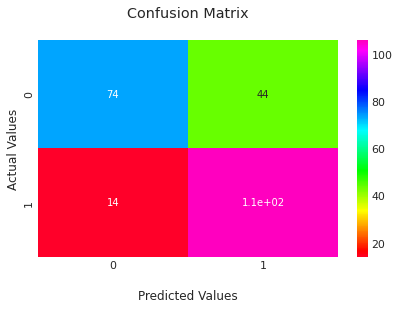

In [ ]:
#Now generate the confusion matrix
cf_matrix = confusion_matrix(y_val, y_pred >= 0.3)

ax = sns.heatmap(cf_matrix, annot=True, cmap='gist_rainbow')

ax.set_title('Confusion Matrix\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

ax.xaxis.set_ticklabels(['0','1'])
ax.xaxis.set_ticklabels(['0','1'])

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# **Decision Trees**

Decision Trees are powerful algorithms, capable of fitting complex datasets. The decision trees make predictions based on a bunch of if/else statements by splitting a node into two or more sub-nodes.

With versatility, the decision tree is also prone to overfitting. One of the reasons why this algorithm often overfits because of its depth. It tends to memorize all the patterns in the train data but struggle to performs well on the unseen data (validation or test set).

To overcome with overfitting problem, we can reduce the complexity of the algorithm by reducing the depth size.

The decision tree with only a single depth is called decision stump and it only has one split from the root.

## **Classes, functions, and methods:**

* DecisionTreeClassifier: classification model from sklearn.tree class.
* max_depth: hyperparameter to control the depth of the decision tree algorithm.
* Min_Samples_Leaf: The minimum samples required to be at a leaf node. Therefore, a split can only happen if it leaves at least the min_samples_leaf in both of the resulting nodes.
* export_text: method from sklearn.tree class to display the text report showing the rules of a decision tree.


In [ ]:
# parameters
max_depth = [4, 5, 6]
min_samples_leaf = [1, 5, 10, 15, 20, 100, 200,300,500]
dt_param_grid = dict(max_depth = max_depth, min_samples_leaf = min_samples_leaf)

#metric
metric = make_scorer(recall_score)

#grid
dt_grid = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state=1),
    param_grid = dt_param_grid,
    n_jobs = -1,
    scoring = metric,
    verbose = 1)

#training the model
dt_grid_results = dt_grid.fit(X_train, y_train)

print('Mean Recall: %.3f' % dt_grid.best_score_)
print('Best Parameters: %s' % dt_grid.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mean Recall: 1.000
Best Parameters: {'max_depth': 4, 'min_samples_leaf': 300}


In [ ]:
from sklearn.tree import export_text
     

In [ ]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=300, random_state = 1)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:,1]

In [ ]:
print(export_text(dt))

|--- feature_10 <= 1.50
|   |--- class: 0
|--- feature_10 >  1.50
|   |--- class: 1



The ROC AUC is 0.81


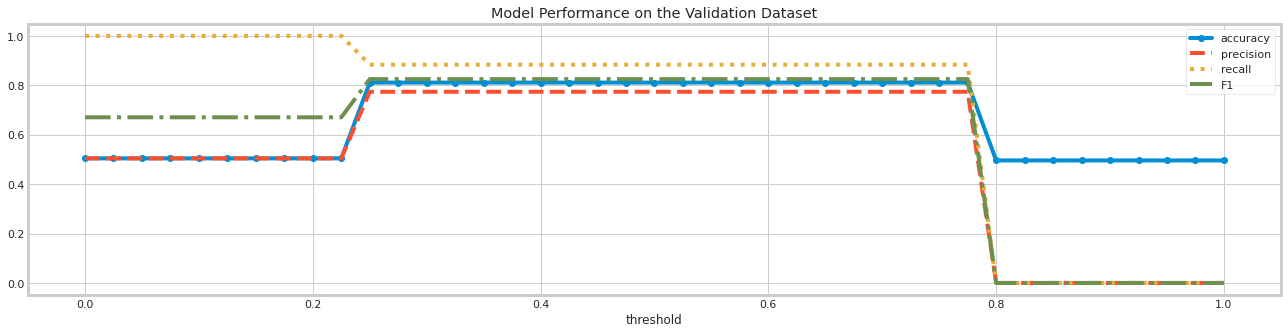

In [ ]:
# apply the threshold function

df_metrics = tune_threshold(y_val,y_pred, 41)
df_metrics.plot(x='threshold', y=['accuracy','precision','recall', 'F1'],
                title = 'Model Performance on the Validation Dataset',
                kind="line", style=['o-','--',':','-.'], figsize=(20,5));

print('The ROC AUC is', roc_auc_score(y_val, y_pred).round(3))

plt.show()

In [ ]:
dt_val_metrics = calc_val_metrics(dt, X_train, y_train, X_val, y_val, y_pred, t=0.4)

For Training Dataset: ACC: 0.776 F1: 0.794 recall: 0.809 ROC AUC: 0.773
For Validation Dataset: ACC: 0.811 F1: 0.825 recall: 0.883 ROC AUC: 0.81


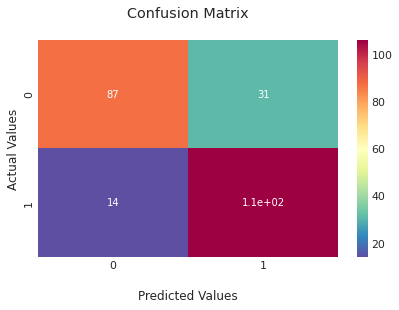

In [ ]:
#Now generate the confusion matrix
cf_matrix = confusion_matrix(y_val, y_pred >= 0.4)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Spectral_r')

ax.set_title('Confusion Matrix\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

ax.xaxis.set_ticklabels(['0','1'])
ax.xaxis.set_ticklabels(['0','1'])

plt.show()

In [ ]:
from sklearn import tree


In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


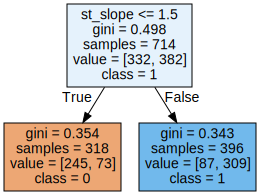

In [ ]:
# prepare the data in the 'dot' format
feature_names = numerical + dv.get_feature_names()
dot_data = tree.export_graphviz(dt, out_file = None,
                                feature_names = feature_names,
                                class_names = ['0', '1'],# No Heart Disease Patients are in blue, Heart Disease Patients in orange
                                filled = True)

#plot the tree
graph = graphviz.Source(dot_data, format ="png")
graph

# **Random Forest**



> class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None) [source](https://github.com/scikit-learn/scikit-learn/blob/98cf537f5/sklearn/ensemble/_forest.py#L1082)


A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the `max_samples` parameter if `bootstrap=True` (default), otherwise the whole dataset is used to build each tree.


Read more in the [User Guide](https://scikit-learn.org/stable/modules/ensemble.html#forest).

## **Methods**

* apply(X) - Apply trees in the forest to X, return leaf indices.
* decision_path(X) - Return the decision path in the forest.
* fit(X, y[, sample_weight]) - Build a forest of trees from the training set (X, y).
* get_params([deep]) - Get parameters for this estimator.
* predict(X) - Predict class for X.
* predict_log_proba(X)- Predict class log-probabilities for X.
* predict_proba(X) - Predict class probabilities for X.
* score(X, y[, sample_weight]) - Return the mean accuracy on the given test data and labels.
* set_params(**params) - Set the parameters of this estimator.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# parameters
max_depth = [5, 10]
min_samples_leaf = [5, 10]
n_estimators = [50, 100, 150]

rf_param_grid = dict(max_depth = max_depth,  min_samples_leaf = min_samples_leaf, n_estimators = n_estimators)

#model
rf = RandomForestClassifier(max_depth = max_depth,
                           min_samples_leaf = min_samples_leaf, 
                           n_estimators = n_estimators,
                           random_state = 1)

# metric
metric = make_scorer(f1_score)

#grid
rf_grid = GridSearchCV(
    estimator = rf,
    param_grid = rf_param_grid,
    n_jobs = -1,
    scoring = metric,
    verbose = 1)

# train the model
rf_grid_results = rf_grid.fit(X_train, y_train)

print('Mean Recall: %.3f' % rf_grid.best_score_)
print('Best Parameters: %s' % rf_grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mean Recall: 0.884
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 100}


In [ ]:
best_rf = rf_grid_results.best_estimator_
y_pred = best_rf.predict_proba(X_val)[:,1]

The ROC AUC is 0.903


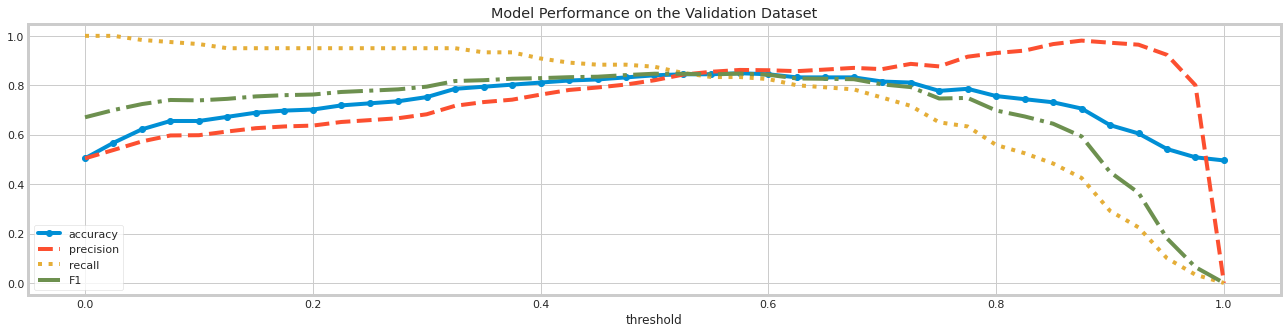

In [ ]:
# apply the threshold function

df_metrics = tune_threshold(y_val,y_pred, 41)
df_metrics.plot(x='threshold', y=['accuracy','precision','recall', 'F1'],
                title = 'Model Performance on the Validation Dataset',
                kind="line", style=['o-','--',':','-.'], figsize=(20,5));

print('The ROC AUC is', roc_auc_score(y_val, y_pred).round(3))

plt.show()

In [ ]:
df_metrics[df_metrics.F1.round(3) == max(df_metrics.F1.round(3))].round(3)

,threshold,accuracy,precision,recall,F1
20,0.500,0.840,0.820,0.875,0.847
23,0.575,0.849,0.862,0.833,0.847


In [ ]:
rf_val_metrics = calc_val_metrics(best_rf, X_train, y_train, X_val, y_val, y_pred, t =0.4)

For Training Dataset: ACC: 0.913 F1: 0.924 recall: 0.984 ROC AUC: 0.981
For Validation Dataset: ACC: 0.811 F1: 0.829 recall: 0.908 ROC AUC: 0.903


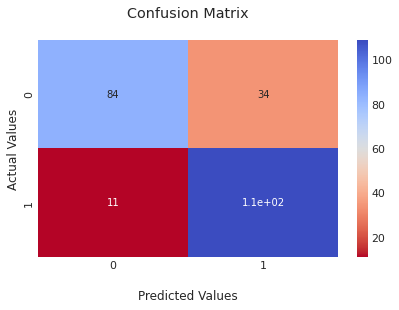

In [ ]:
#Now generate the confusion matrix
cf_matrix = confusion_matrix(y_val, y_pred >= 0.4)

ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm_r')

ax.set_title('Confusion Matrix\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

ax.xaxis.set_ticklabels(['0','1'])
ax.xaxis.set_ticklabels(['0','1'])

plt.show()

# **Gradient Boosting**

**Gradient boosting** is a supervised machine learning algorithm, which tries to predict a target variable by combining the estimates of a set of simpler, weaker models.

## **Command line parameters**


The most important parameters that we should know about are as follows:-


`max_depth `- It determines how deeply each tree is allowed to grow during any boosting round.



`n_estimators` - It is the number of trees we want to build.

`objective-` It determines the loss function to be used in the process. For example, `reg:linear` for regression problems, `reg:logistic` for classification problems with only decision, `binary: logistic` for classification problems with probability.

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names = feature_names)
dval = xgb.DMatrix(X_val, y_val, feature_names = feature_names)

for eta in [0.05, 0.1, 0.3]:
  for max_depth in [4, 8, 12]:
    for min_child_weight in [1, 5, 10]:
      # parameters
      xgb_params = {
          'eta': eta,
          'max_depth': max_depth,
          'min_child_weight': min_child_weight,
          'objective': 'binary:logistic',
          'eval_metric': 'auc'}
      
      # train model
      model = xgb.train(xgb_params,dtrain, num_boost_round = 10)

      #apply model
      y_pred = model.predict(dval)

      #evaluate performance
      xgb_rec = recall_score(y_val, y_pred >= 0.4)
      print('recall =', xgb_rec.round(3),
            'eta:',eta, 'max_depth:', max_depth, 'min_child_weight:', min_child_weight)
      

recall = 0.942 eta: 0.05 max_depth: 4 min_child_weight: 1
recall = 0.942 eta: 0.05 max_depth: 4 min_child_weight: 5
recall = 0.933 eta: 0.05 max_depth: 4 min_child_weight: 10
recall = 0.925 eta: 0.05 max_depth: 8 min_child_weight: 1
recall = 0.958 eta: 0.05 max_depth: 8 min_child_weight: 5
recall = 0.933 eta: 0.05 max_depth: 8 min_child_weight: 10
recall = 0.925 eta: 0.05 max_depth: 12 min_child_weight: 1
recall = 0.958 eta: 0.05 max_depth: 12 min_child_weight: 5
recall = 0.933 eta: 0.05 max_depth: 12 min_child_weight: 10
recall = 0.933 eta: 0.1 max_depth: 4 min_child_weight: 1
recall = 0.925 eta: 0.1 max_depth: 4 min_child_weight: 5
recall = 0.925 eta: 0.1 max_depth: 4 min_child_weight: 10
recall = 0.908 eta: 0.1 max_depth: 8 min_child_weight: 1
recall = 0.925 eta: 0.1 max_depth: 8 min_child_weight: 5
recall = 0.925 eta: 0.1 max_depth: 8 min_child_weight: 10
recall = 0.908 eta: 0.1 max_depth: 12 min_child_weight: 1
recall = 0.925 eta: 0.1 max_depth: 12 min_child_weight: 5
recall = 0.9

In [ ]:
 # parameters
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc'}
      
# train model
model = xgb.train(xgb_params,dtrain, num_boost_round = 10)

#apply model
y_pred = model.predict(dval)


The ROC AUC is 0.877


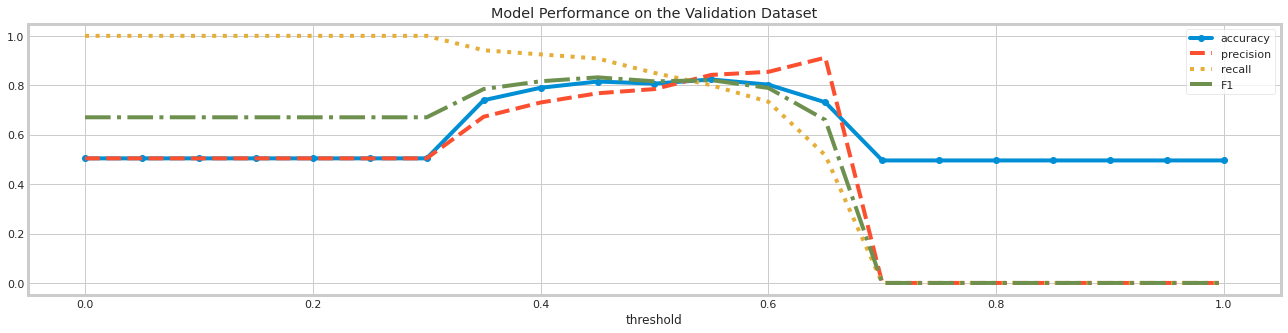

In [ ]:
# apply the threshold function

df_metrics = tune_threshold(y_val,y_pred, 21)
df_metrics.plot(x='threshold', y=['accuracy','precision','recall', 'F1'],
                title = 'Model Performance on the Validation Dataset',
                kind="line", style=['o-','--',':','-.'], figsize=(20,5));

print('The ROC AUC is', roc_auc_score(y_val, y_pred).round(3))

plt.show()

In [ ]:
xgb_rec = recall_score(y_val, y_pred >= 0.4)
print('XGBoost Recall =', xgb_rec.round(3))

XGBoost Recall = 0.925


# **Feature Importance: XGBoost**

XGBoost has a **plot_importance( )** function that helps us to achieve this task. Then we can visualize the features that has been given the highest important score among all the features.

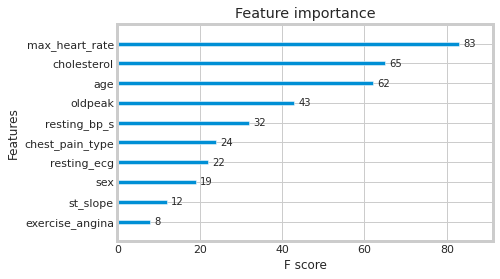

In [ ]:
#feature importance
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] =[25,10]
plt.show()

`xgb_cv` contains train and test `auc` metrics for each boosting round. Let's preview `xgb_cv`.

In [ ]:
cv_results = xgb.cv(dtrain = dtrain, params = xgb_params, nfold=5, num_boost_round=10, as_pandas= True,seed = 1)
cv_results.iloc[-1].round(3)

train-auc-mean    0.972
train-auc-std     0.007
test-auc-mean     0.902
test-auc-std      0.034
Name: 9, dtype: float64

Now, we will choose and test the final model.

In [ ]:
print('Model Performance on the Validation')

df_metrics_metric = pd.DataFrame(['Accuracy','F1','Recall', 'ROC_AUC'])
df_metrics_lr = pd.DataFrame(lr_val_metrics).T
df_metrics_dt = pd.DataFrame(dt_val_metrics).T
df_metrics_rf = pd.DataFrame(rf_val_metrics).T
df_final_metrics = pd.concat([df_metrics_metric, df_metrics_lr, df_metrics_dt, df_metrics_rf], axis=1)

df_final_metrics.columns = ['metric', 'Logistic Regression','Decision Tree','Random Forest']
df_final_metrics.set_index('metric')



Model Performance on the Validation


,Logistic Regression,Decision Tree,Random Forest
metric,,,
Accuracy,0.756303,0.810924,0.810924
F1,0.785185,0.824903,0.828897
Recall,0.883333,0.883333,0.908333
ROC_AUC,0.875636,0.810311,0.902825


Checking the results stability with a k-fold Cross Validation 

In [ ]:
models = []

models.append(('lr', LogisticRegression(max_iter = 150, random_state =1)))
models.append(('dt', DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 300, random_state =1)))
models.append(('rf', RandomForestClassifier(max_depth = 10, min_samples_leaf = 5, n_estimators = 100,random_state =1)))

In [ ]:
results = []
names = []
metrics = make_scorer(recall_score)

print("The Mean and Standard Diveation of the Performance Metric Recall for the Model:")
print()

for name, model in models:
  kfold = KFold(n_splits = 10, shuffle = True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = metric)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean().round(2), '+-', cv_results.std().round(1))
  

The Mean and Standard Diveation of the Performance Metric Recall for the Model:

lr 0.84 +- 0.1
dt 0.79 +- 0.0
rf 0.87 +- 0.0


In [ ]:
# Train
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = df_full_train.target.values

full_train_dict = df_full_train[categorical].to_dict(orient='records')
X_full_train_cat = dv.fit_transform(full_train_dict)

X_full_train_num = df_full_train[numerical].values
X_full_train_num = scaler.fit_transform(X_full_train_num)

X_full_train = np.column_stack([X_full_train_num, X_full_train_cat])

# Test
df_test = df_test.reset_index(drop=True)
y_test = df_test.target.values

del df_test['target']

test_dict = df_test[categorical].to_dict(orient='records')
X_test_cat = dv.transform(test_dict)

X_test_num = df_test[numerical].values
X_test_num = scaler.transform(X_test_num)

X_test = np.column_stack([X_test_num, X_test_cat])

We train and apply the final model.


In [ ]:
rf = RandomForestClassifier(max_depth = 10, min_samples_leaf = 5, n_estimators = 50, random_state =1)

model = rf.fit(X_full_train, y_full_train)
y_pred = rf.predict_proba(X_test)[:,1]

t = 0.4

acc = accuracy_score(y_test, y_pred >= t)
f1 = f1_score(y_test, y_pred >= t)
rec = recall_score(y_test, y_pred >= t)
auc = roc_auc_score(y_test, y_pred)
print('For Testing Dataset:','ACC:', acc.round(3),'F1:',f1.round(3),'Recall:',rec.round(3),
        'ROC AUC:',auc.round(3))



For Testing Dataset: ACC: 0.878 F1: 0.891 Recall: 0.937 ROC AUC: 0.964


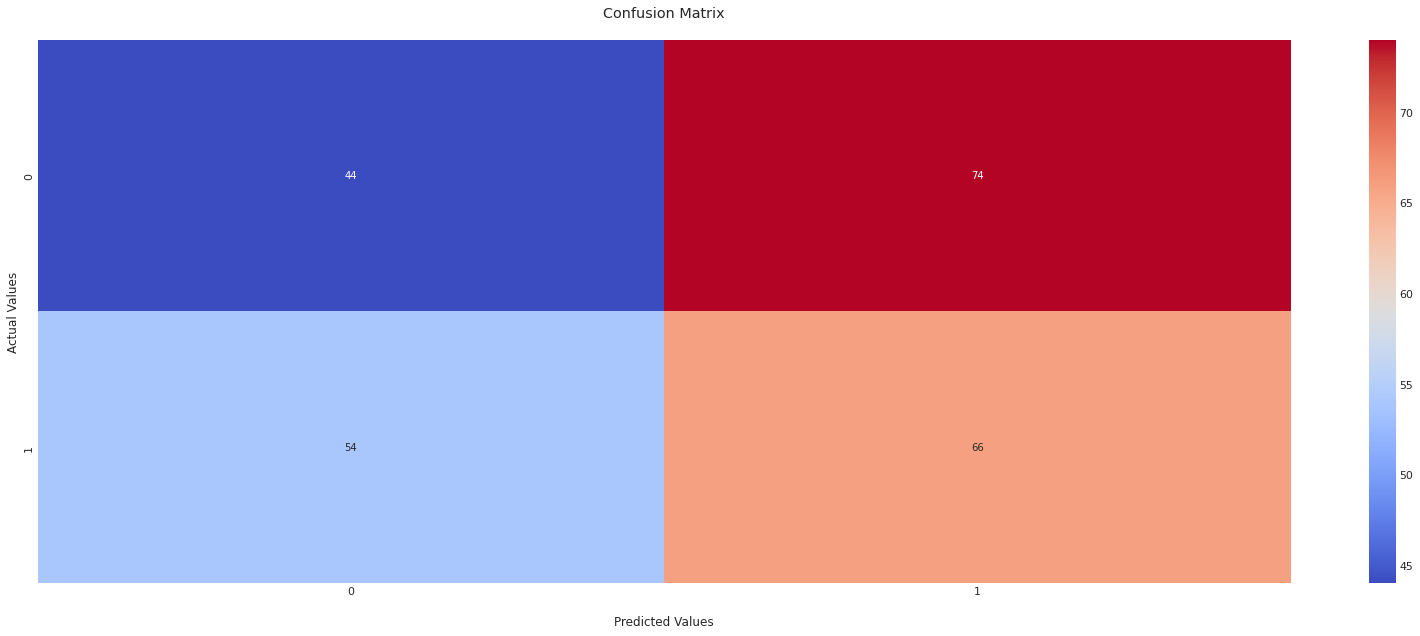

In [ ]:
cf_matrix = confusion_matrix(y_val, y_pred >= 0.4)

ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm')

ax.set_title('Confusion Matrix\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

ax.xaxis.set_ticklabels(['0','1'])
ax.xaxis.set_ticklabels(['0','1'])

plt.show()

# **Model Application**

In [ ]:
i = 2
patient = df_test.iloc[i].to_dict()
patient

{'age': 62.0,
 'sex': 0.0,
 'chest_pain_type': 4.0,
 'resting_bp_s': 120.0,
 'cholesterol': 0.0,
 'fasting_blood_sugar': 1.0,
 'resting_ecg': 1.0,
 'max_heart_rate': 123.0,
 'exercise_angina': 1.0,
 'oldpeak': 1.7,
 'st_slope': 3.0}

In [ ]:
patient = {
    'age': 62.0,
    'sex': 0.0,
    'chest_pain_type': 4.0,
    'resting_bp_s': 120.0,
    'cholesterol': 0.0,
    'fasting_blood_sugar': 1.0,
    'resting_ecg': 1.0,
    'max_heart_rate': 123.0,
    'exercise_angina': 1.0,
    'oldpeak': 1.7,
    'st_slope': 3.0
    }

In [ ]:
num_dict = dict()
cat_dict = dict()

for (key, value) in patient.items():
  if key in numerical:
    num_dict[key] = value
  else:
    cat_dict[key] = value

X_cat = dv.transform(cat_dict)

X_num = np.array(list(num_dict.values())).reshape(1, -1)
X_num = scaler.transform(X_num)

X = np.column_stack([X_num, X_cat])

Then, apply the model

In [ ]:
y_pred = rf.predict_proba(X)[:,1]
print('Application of the model for a patient:')
print()
print('The patient raw probability of have a heart diseases:', y_pred[0].round(2))
print()
print("with t =", t, "as the decision threshold, is there a patient who is suffering from heart risk", y_pred[0] >= t)


Application of the model for a patient:

The patient raw probability of have a heart diseases: 0.85

with t = 0.4 as the decision threshold, is there a patient who is suffering from heart risk True
